# Homework assignment

- Implement Logistic Regression using One-vs-All algorythm on full digits dataset
- Implement Logistic Regression using Softmax algorythm on the same dataset with the same split
- Compare results
- Add regularization to both approaches: С=100, С=10, С=0.1, С=0.01
- Compare new results

## Preparation

In [2]:
# Import needed libraries
import pandas
import numpy
import matplotlib.pyplot as plot
import seaborn

# plot stuff inline
%matplotlib inline

In [3]:
# Load digits dataset
from sklearn import datasets
digits_dataset = datasets.load_digits()

## Exploratory Data Analysis

In [4]:
# Visualize dataset keys
print("Dataset descrption:")
print(digits_dataset.DESCR)

# Visualize dataset keys
print("Dataset contents:")
print(digits_dataset.keys())

print (f"Data shape: {digits_dataset.data.shape}");
print (f"Data target shape: {digits_dataset.target.shape}");

print("\n")
print("First data representation:\n",digits_dataset.data[0])
print("First data shape:\n",digits_dataset.data[0].shape)

print ("\n")
print("First image representation:\n",digits_dataset.images[0])
print("First image shape:\n",digits_dataset.images[0].shape)

Dataset descrption:
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 whe

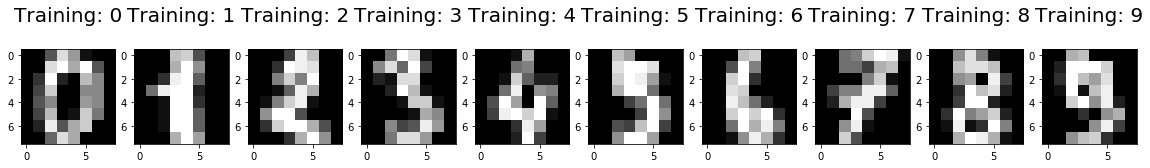

In [5]:
max_index = 10

def previewDataset (max_index=10): # Plot first max_index elements
    plot.figure(figsize=(20,4))
    for index, (image, label) in enumerate(zip(digits_dataset.data[:max_index], digits_dataset.target[:max_index])):
        plot.subplot(1, max_index, index + 1)
        plot.imshow(numpy.reshape(image, (8,8)), cmap=plot.cm.gray)
        plot.title('Training: %i\n' % label, fontsize = 20)
    return
previewDataset()

## Support Functions

### Misspredictions

In [6]:
def PreviewMisprediction(Predictions, Mispredictions):
    from random import randint
    rand_index = randint(0, len(Mispredictions))
    rand_index -= 1
    
    plot.imshow(numpy.reshape(X_test[Mispredictions[rand_index]], (8,8)), cmap=plot.cm.gray)
    plot.title(f"Predicted: {Predictions[Mispredictions[rand_index]]}, Actual: {Y_test[Mispredictions[rand_index]]}", fontsize = 15)

def Mispredictions(Predictions_in, PRM=True):
    index = 0
    mispredictions = []

    for index, (label, predict) in enumerate(zip(Y_test, Predictions_in)):
        if label != predict: 
            mispredictions.append(index)
            index +=1
            
    print(f"Misses: {mispredictions} with {len(mispredictions)} total misses")
    if PRM == True:
        PreviewMisprediction(Predictions_in, mispredictions)


### Confusion Matrices

In [7]:
from sklearn import metrics

def ConfusionMatrix(Predictions_in, Score_in, C_in):
    cm = metrics.confusion_matrix(Y_test, Predictions_in)
    plot.figure(figsize=(8,8))
    seaborn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plot.ylabel('Actual label');
    plot.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0} for C:{1}'.format(Score_in, C_in)
    plot.title(all_sample_title, size = 15);
    plot.show();

## Train Model using OneVsRest Classifier and Logistic Regression

In [8]:
# Split filtered data into train and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(digits_dataset.data, digits_dataset.target, test_size = 0.2, random_state=67)

In [9]:
#Load classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
def OneVsAll (C_in=100, CMP=True, PM=True):
    model_OneVsRest = OneVsRestClassifier(LogisticRegression(C=C_in))
    
    # Train model on prepared dataset
    model_OneVsRest.fit(X_train, Y_train)
    # Make predictions on entire test data
    ovr_predictions = model_OneVsRest.predict(X_test)
    # Use score method to get accuracy of model
    ovr_score = model_OneVsRest.score(X_test, Y_test)
    
    if CMP == True:
        ConfusionMatrix(ovr_predictions,ovr_score,C_in)
        
    if PM == True:
        Mispredictions(ovr_predictions)

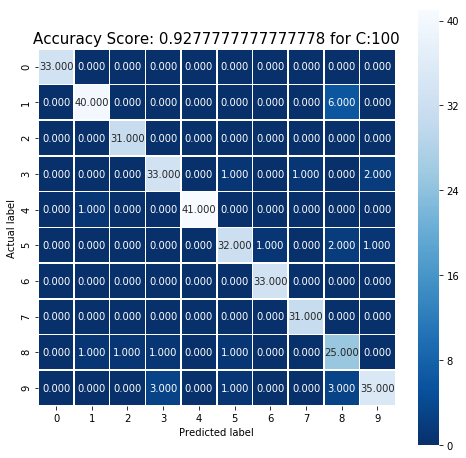

Misses: [29, 31, 38, 87, 88, 116, 126, 140, 180, 196, 197, 202, 206, 224, 231, 242, 269, 272, 277, 313, 315, 317, 324, 325, 337, 346] with 26 total misses


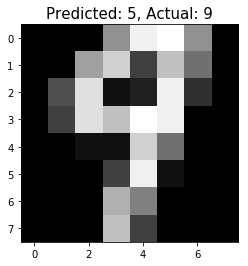

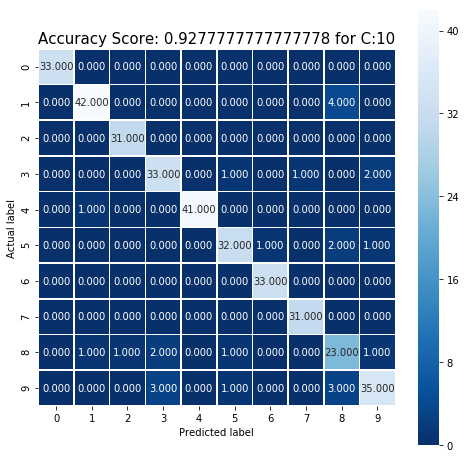

Misses: [18, 29, 38, 87, 88, 116, 126, 140, 180, 190, 196, 197, 202, 224, 231, 242, 269, 272, 277, 313, 315, 317, 324, 325, 337, 346] with 26 total misses


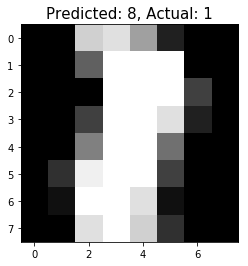

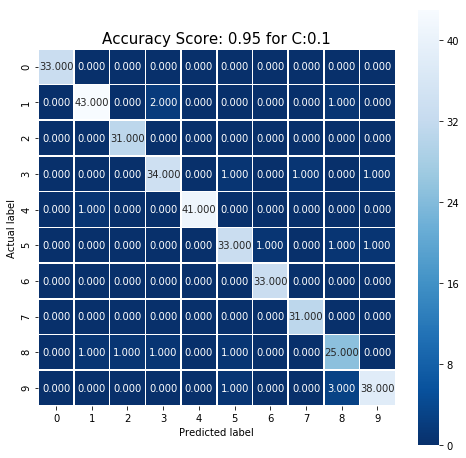

Misses: [29, 31, 38, 87, 109, 126, 180, 190, 196, 197, 224, 231, 242, 269, 277, 301, 325, 346] with 18 total misses


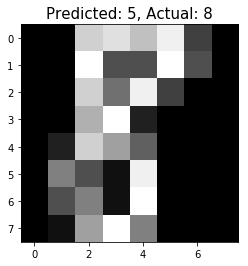

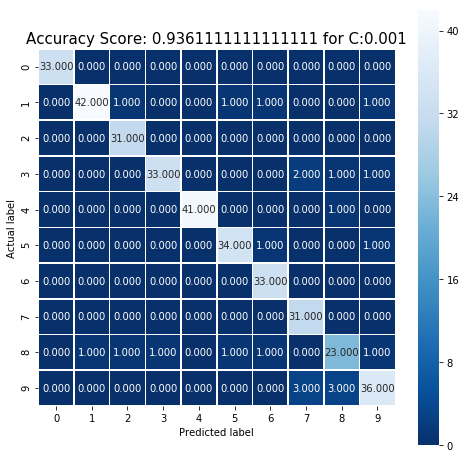

Misses: [18, 29, 30, 38, 44, 109, 164, 180, 190, 196, 197, 199, 224, 231, 244, 249, 269, 277, 301, 305, 325, 346, 349] with 23 total misses


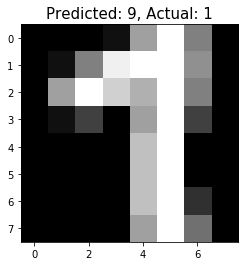

In [11]:
OneVsAll()
OneVsAll(C_in=10)
OneVsAll(C_in=0.1)
OneVsAll(C_in=0.001)

##  Train Model using SoftMax

In [12]:
# Define Logistic Regression function that will fit and predict model based on C_in
def SoftMax(C_in=100, CMP=True, PM=True):
    model_SoftMax = LogisticRegression(solver='lbfgs', multi_class='multinomial', C=C_in, max_iter=10000)
    model_SoftMax.fit(X_train, Y_train)
    sm_predictions = model_SoftMax.predict(X_test)

    # Use score method to get accuracy of model
    sm_score = model_SoftMax.score(X_test, Y_test)
    
    if CMP == True:
        ConfusionMatrix(sm_predictions, sm_score, C_in)
        
    if PM == True:
        Mispredictions(sm_predictions)

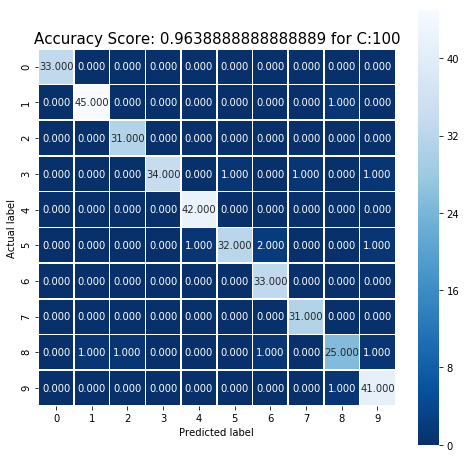

Misses: [29, 38, 88, 126, 196, 231, 242, 269, 272, 277, 301, 305, 346] with 13 total misses


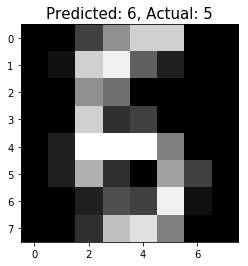

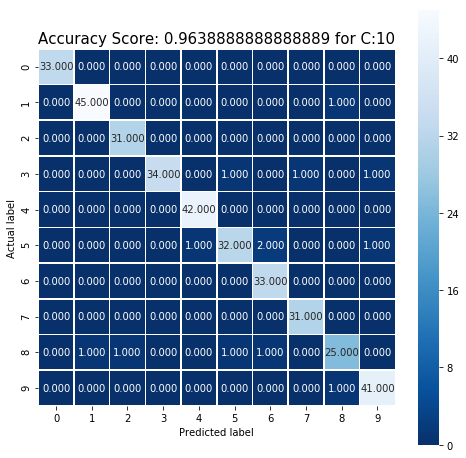

Misses: [29, 38, 88, 126, 196, 231, 242, 269, 272, 277, 301, 305, 346] with 13 total misses


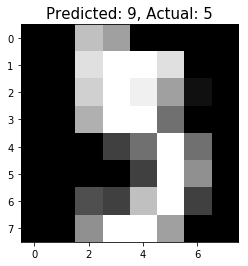

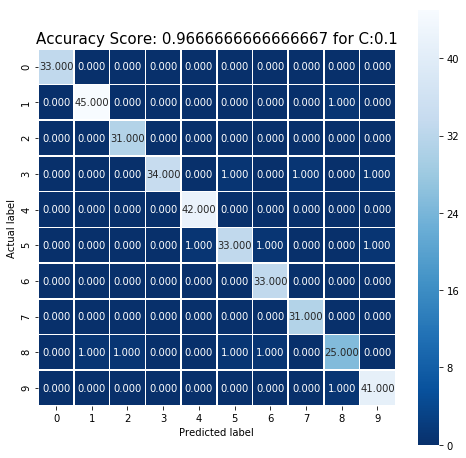

Misses: [29, 38, 88, 126, 196, 231, 242, 269, 277, 301, 305, 346] with 12 total misses


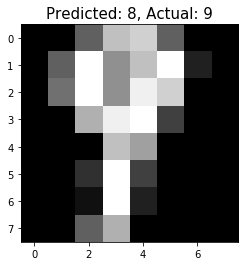

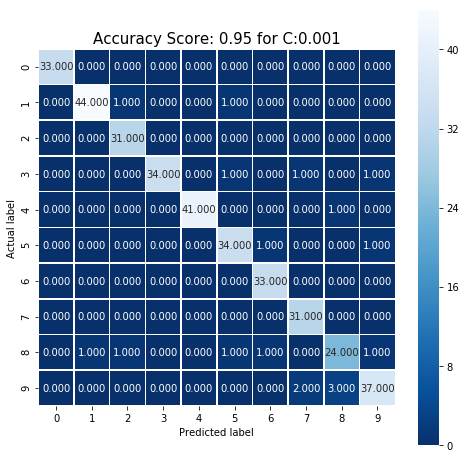

Misses: [18, 29, 38, 44, 88, 126, 164, 180, 197, 231, 244, 249, 269, 277, 301, 325, 346, 349] with 18 total misses


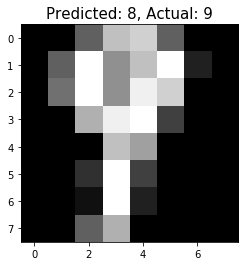

In [13]:
SoftMax()
SoftMax(C_in=10)
SoftMax(C_in=0.1)
SoftMax(C_in=0.001)

## Resources:
- https://utkuufuk.github.io/2018/06/03/one-vs-all-classification/
- http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/
- https://scikit-learn.org/stable/modules/multiclass.html